In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {return false;}
// Avoid scrollable output for many plots

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import itertools
import tqdm
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)
df = pd.read_parquet('data_2018-Oct-25.parquet')
print('Number cars: {}'.format(df.shape[0]));
df.head()

Number cars: 490


,headline,year,odometer,price,description,horsepower,region,transmissionManual,fuelTypeGasoline,carTypeStationCar,engineSize,trim
0,"Skoda Fabia 1,4 TDi 105 Ambition Combi 5d",2016,45000.0,149123.0,"Alu., Fuldaut. Klima, Fjernb. C.Lås, Parkering...",105.0,Syd- og Vestsjælland,True,False,True,"1,4",Ambition
1,"Skoda Fabia 1,2 TSi 90 Style Combi 5d",2016,55000.0,149800.0,Udvidet Fabriks Garanti Til 04-03-2020 Dog Mak...,90.0,Syd- og Vestsjælland,True,True,True,"1,2",Style
2,"Skoda Fabia 1,2 TSi 110 Style Combi 5d",2015,49000.0,149900.0,Udvidet Garanti Frem Til 6/2020 Eller 100.000 ...,110.0,Østjylland,True,True,True,"1,2",Style
3,"Skoda Fabia 1,4 16V 75 Ambiente Combi 5d",2005,131000.0,44900.0,"Airc., Træk, Fartpilot, Sædevarme, Kørecompute...",75.0,København,True,True,True,"1,4",Ambiente
4,"Skoda Fabia 1,2 TSi 90 Active 5d",2016,34000.0,134990.0,+++ 2016 MODEL Active ++ LAVT KM TAL | Aft. T...,90.0,Syd- og Sønderjylland,True,True,False,"1,2",Active


In [3]:
df[df.isnull().any(axis=1)]

,headline,year,odometer,price,description,horsepower,region,transmissionManual,fuelTypeGasoline,carTypeStationCar,engineSize,trim
181,"Skoda Fabia 1,4 16V 75 Tundra Combi 5d",2005,271000.0,12500.0,"C.Lås, Fjernb. C.Lås, Fartpilot, Kørecomputer,...",75.0,Østjylland,True,True,True,"1,4",None


In [4]:
df.describe()

,year,odometer,price,horsepower
count,490.000000,490.000000,490.000000,490.000000
mean,2011.475510,116578.279592,87660.485714,87.828571
std,4.645777,85607.792034,52973.696961,14.614025
min,2000.000000,1000.000000,4999.000000,54.000000
25%,2008.000000,39000.000000,42600.000000,75.000000
50%,2011.000000,105000.000000,74850.000000,86.000000
75%,2016.000000,176000.000000,143780.000000,101.000000
max,2019.000000,443000.000000,207800.000000,110.000000


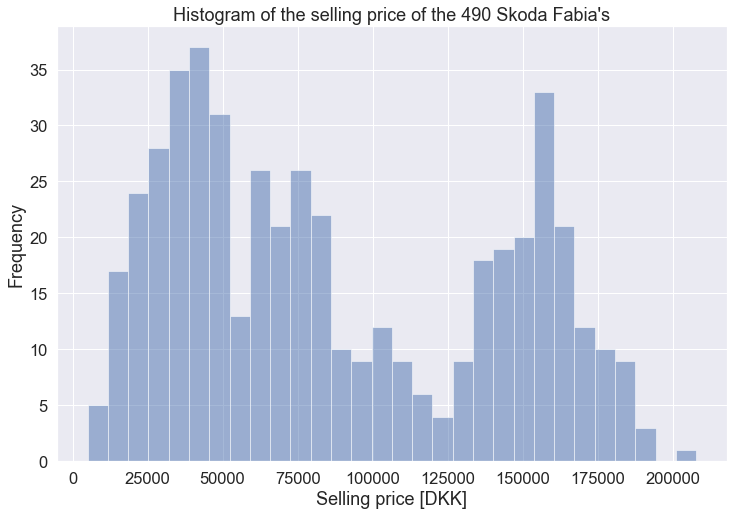

In [5]:
plt.rcParams["figure.figsize"] =(12,8)
ax = df['price'].plot.hist(bins=30, alpha=0.5);
ax.set_xlabel('Selling price [DKK]');
ax.set_title(f"Histogram of the selling price of the {df.shape[0]} Skoda Fabia's");

In [6]:
# Plot correlation matrix
corr = df.corr()
cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr.style.background_gradient(cmap, axis=1).set_precision(2)

,year,odometer,price,horsepower,transmissionManual,fuelTypeGasoline,carTypeStationCar
year,1,-0.78,0.93,0.55,-0.28,0.19,0.092
odometer,-0.78,1,-0.86,-0.36,0.21,-0.48,0.047
price,0.93,-0.86,1,0.61,-0.37,0.33,0.1
horsepower,0.55,-0.36,0.61,1,-0.36,0.074,0.11
transmissionManual,-0.28,0.21,-0.37,-0.36,1,-0.13,-0.021
fuelTypeGasoline,0.19,-0.48,0.33,0.074,-0.13,1,-0.093
carTypeStationCar,0.092,0.047,0.1,0.11,-0.021,-0.093,1


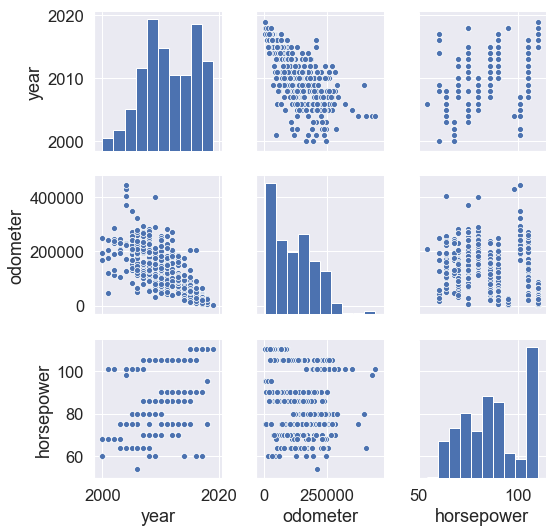

In [7]:
sns.pairplot(df[['year', 'odometer', 'horsepower']].copy());

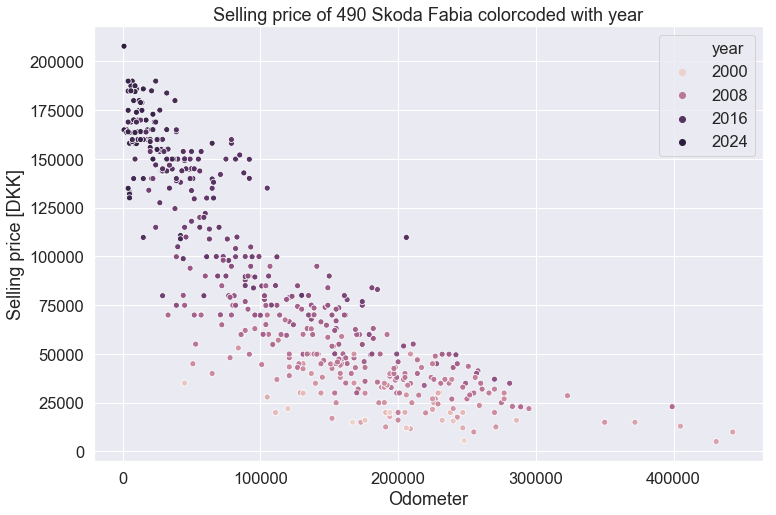

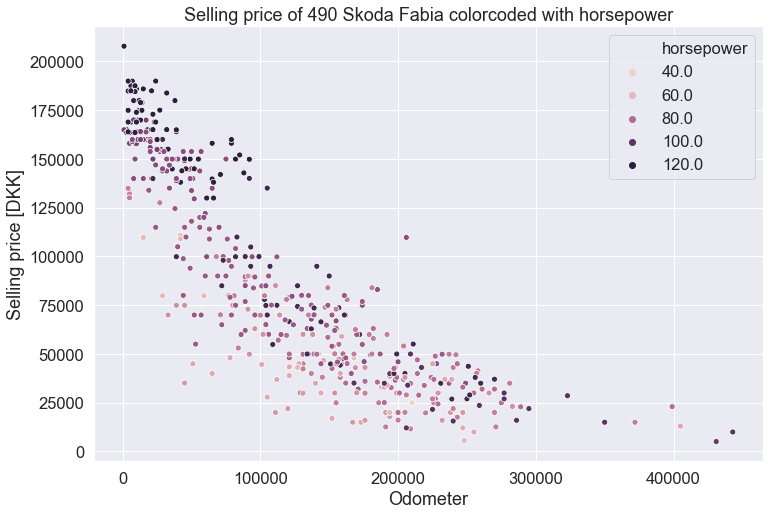

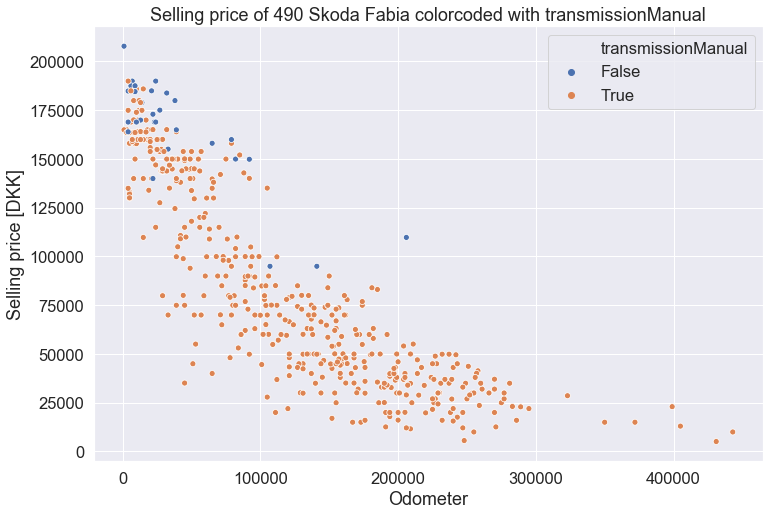

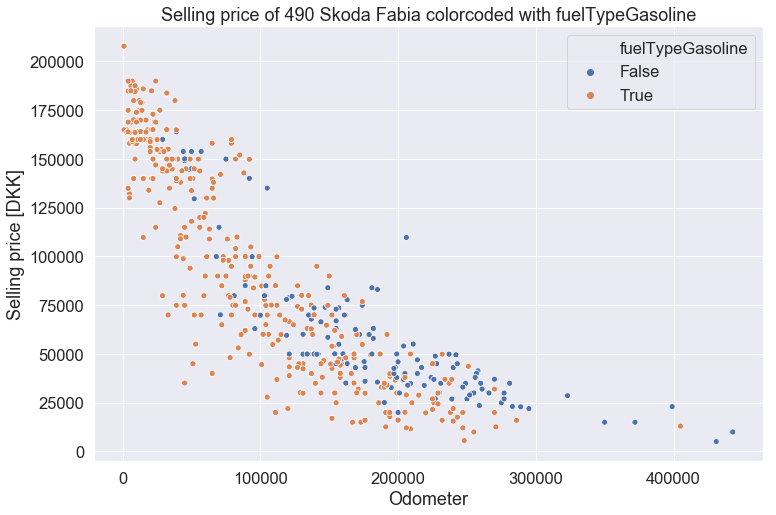

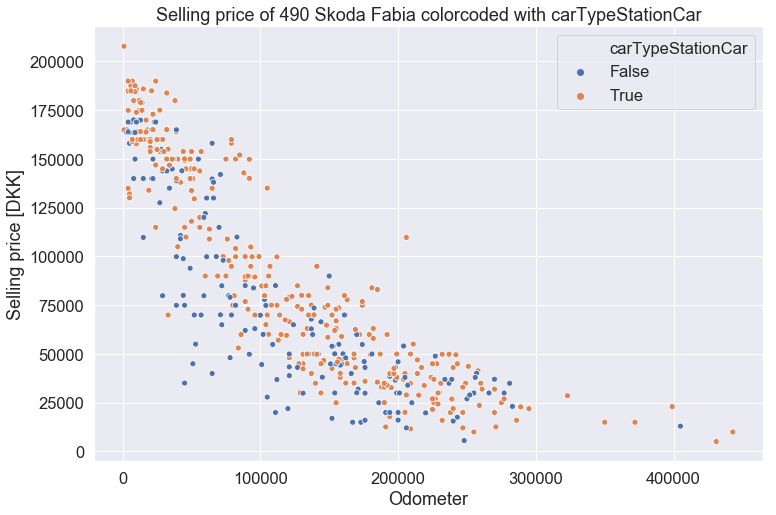

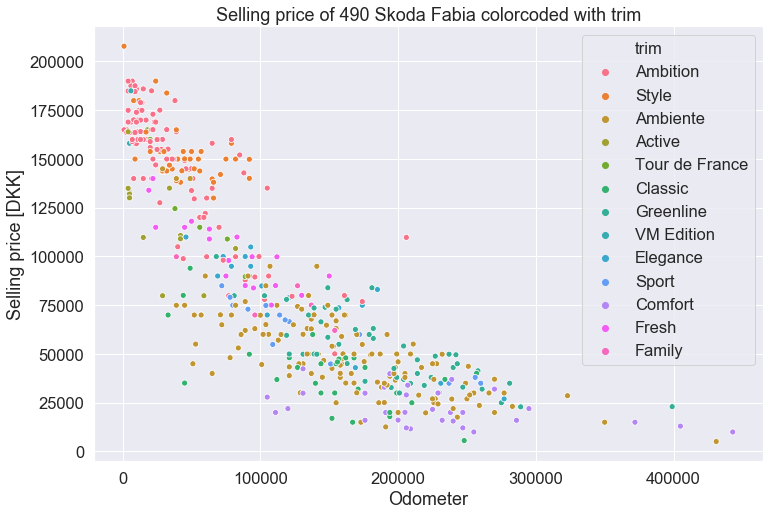

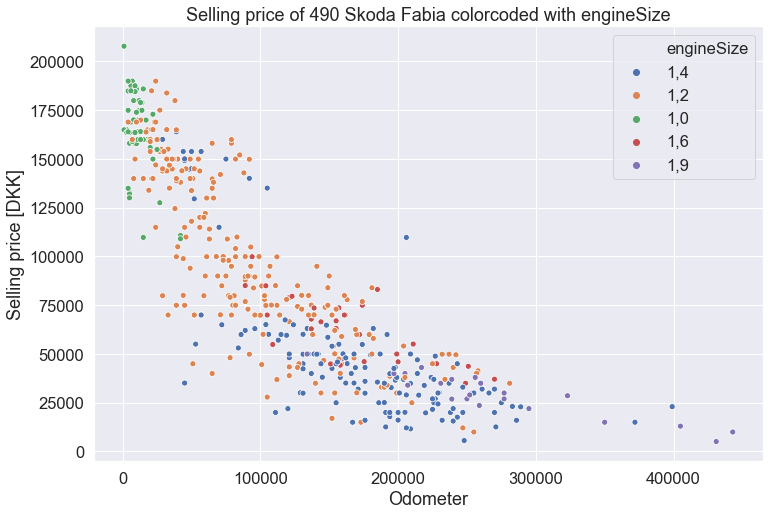

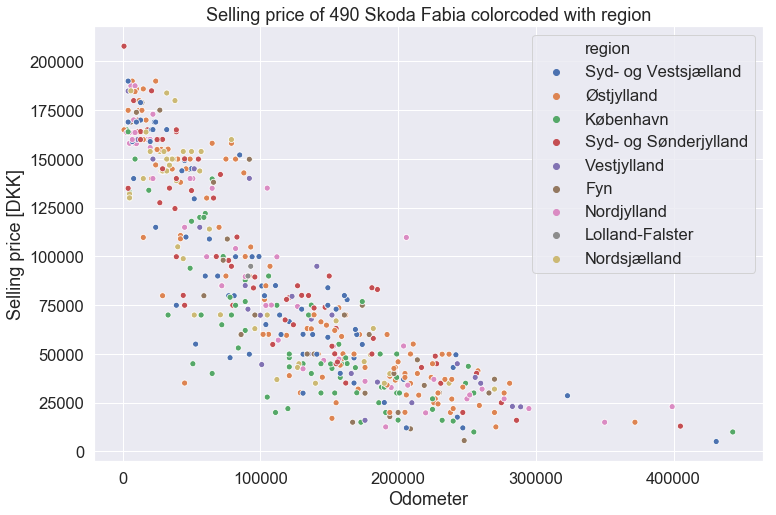

In [8]:
plt.rcParams["figure.figsize"] =(12,8)
for hue in [
    'year', 
    'horsepower', 
    'transmissionManual', 
    'fuelTypeGasoline', 
    'carTypeStationCar', 
    'trim', 
    'engineSize', 
    'region']:
    ax = sns.scatterplot(x="odometer", y="price", hue=hue, data=df)
    ax.set_ylabel('Selling price [DKK]');
    ax.set_xlabel('Odometer');
    ax.set_title(f'Selling price of {df.shape[0]} Skoda Fabia colorcoded with {hue}');
    plt.show()

In [9]:
# Find cars comparable to my own
df_selected = df[
    (df.fuelTypeGasoline == True) &
    (df.transmissionManual == False) &
    (df.odometer < 50000) &
    (df.carTypeStationCar == True)
]
print(f'Number of selected cars: {df_selected.shape[0]}')
df_selected.head()

Number of selected cars: 13


,headline,year,odometer,price,description,horsepower,region,transmissionManual,fuelTypeGasoline,carTypeStationCar,engineSize,trim
8,"Skoda Fabia 1,2 TSi 110 Style Combi DSG 5d",2017,24000.0,189900.0,"Android Auto, Apple Carplay, Aftag. Træk, Fuld...",110.0,Østjylland,False,True,True,"1,2",Style
9,"Skoda Fabia 1,0 TSi 110 Ambition Combi DSG 5d",2018,4000.0,184800.0,"Fuldaut. Klima, Fjernb. C.Lås, Parkeringssenso...",110.0,Vestjylland,False,True,True,"1,0",Ambition
12,"Skoda Fabia 1,0 TSi 110 Ambition Combi DSG 5d",2018,7000.0,189900.0,"Fuldaut. Klima, Fjernb. C.Lås, Parkeringssenso...",110.0,Østjylland,False,True,True,"1,0",Ambition
26,"Skoda Fabia 1,0 TSi 110 Ambition Combi DSG 5d",2018,6000.0,187500.0,"Aut.Gear/Tiptronic, DSG, Automatisk Nødbremse,...",110.0,Nordjylland,False,True,True,"1,0",Ambition
29,"Skoda Fabia 1,2 TSi 110 Ambition Combi DSG 5d",2017,27000.0,175000.0,Super Fin Skoda Fabia Med DSG.\n\nHøjdejust. F...,110.0,Fyn,False,True,True,"1,2",Ambition


In [10]:
df_selected.describe()

,year,odometer,price,horsepower
count,13.000000,13.000000,13.000000,13.0
mean,2017.538462,17923.076923,183336.923077,110.0
std,0.776250,12499.743587,11967.360740,0.0
min,2016.000000,1000.000000,155000.000000,110.0
25%,2017.000000,7000.000000,179900.000000,110.0
50%,2018.000000,21000.000000,184800.000000,110.0
75%,2018.000000,27000.000000,187500.000000,110.0
max,2019.000000,38000.000000,207800.000000,110.0


In [11]:
# Plot correlation matrix
corr = df_selected[['year', 'odometer', 'price']].corr()
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap=cmap);
cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr.style.background_gradient(cmap, axis=1).set_precision(2)

,year,odometer,price
year,1,-0.85,0.76
odometer,-0.85,1,-0.65
price,0.76,-0.65,1


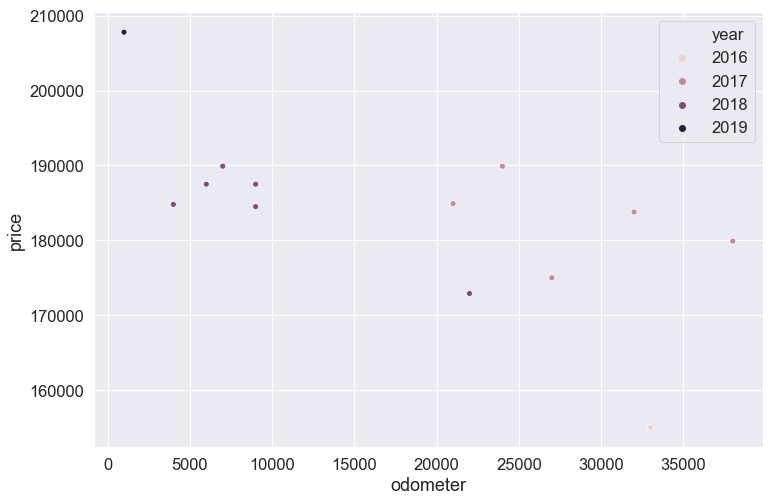

In [12]:
plt.rcParams["figure.figsize"] = (12,8)
ax = sns.scatterplot(x="odometer", y="price", hue="year", data=df_selected)